<h1>Model<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Neural-&amp;-Behavioral-Modeling---Week-11-(Exercises)" data-toc-modified-id="Neural-&amp;-Behavioral-Modeling---Week-11-(Exercises)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Neural &amp; Behavioral Modeling - Week 11 (Exercises)</a></span><ul class="toc-item"><li><span><a href="#1-Tuning-the-performance-of-a-neural-net-(10-points)" data-toc-modified-id="1-Tuning-the-performance-of-a-neural-net-(10-points)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1 Tuning the performance of a neural net (10 points)</a></span><ul class="toc-item"><li><span><a href="#1.1-Problem" data-toc-modified-id="1.1-Problem-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>1.1 Problem</a></span></li><li><span><a href="#1.2-Tips" data-toc-modified-id="1.2-Tips-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>1.2 Tips</a></span></li></ul></li></ul></li><li><span><a href="#Load-MNIST-dataset" data-toc-modified-id="Load-MNIST-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load MNIST dataset</a></span></li><li><span><a href="#目標:-比較使用Numpy/Pytorch搭建的Model，在訓練效率上的差異來源" data-toc-modified-id="目標:-比較使用Numpy/Pytorch搭建的Model，在訓練效率上的差異來源-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>目標: 比較使用Numpy/Pytorch搭建的Model，在訓練效率上的差異來源</a></span><ul class="toc-item"><li><span><a href="#問題" data-toc-modified-id="問題-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>問題</a></span></li><li><span><a href="#實作Tip" data-toc-modified-id="實作Tip-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>實作Tip</a></span><ul class="toc-item"><li><span><a href="#Tip1" data-toc-modified-id="Tip1-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Tip1</a></span></li></ul></li></ul></li><li><span><a href="#PyTorch-Model-在這裡" data-toc-modified-id="PyTorch-Model-在這裡-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PyTorch Model 在這裡</a></span></li><li><span><a href="#Numpy-Model-在這裡" data-toc-modified-id="Numpy-Model-在這裡-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Numpy Model 在這裡</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#[Numpy]-Activation-&amp;-error-functions" data-toc-modified-id="[Numpy]-Activation-&amp;-error-functions-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>[Numpy] Activation &amp; error functions</a></span></li><li><span><a href="#[Numpy]-Layers" data-toc-modified-id="[Numpy]-Layers-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>[Numpy] Layers</a></span></li><li><span><a href="#[Numpy]-Optimizers" data-toc-modified-id="[Numpy]-Optimizers-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>[Numpy] Optimizers</a></span></li><li><span><a href="#[Numpy]-Network" data-toc-modified-id="[Numpy]-Network-5.0.4"><span class="toc-item-num">5.0.4&nbsp;&nbsp;</span>[Numpy] Network</a></span></li><li><span><a href="#[Numpy]-Training-the-network" data-toc-modified-id="[Numpy]-Training-the-network-5.0.5"><span class="toc-item-num">5.0.5&nbsp;&nbsp;</span>[Numpy] Training the network</a></span></li></ul></li></ul></li></ul></div>

# Neural & Behavioral Modeling - Week 11 (Exercises)
by 劉昱維 (r08227111@ntu.edu.tw)

In [1]:
# Upgrade PyTorch if necessary:
! conda install -y pytorch-cpu torchvision-cpu -c pytorch

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\Anaconda3

  added / updated specs:
    - pytorch-cpu
    - torchvision-cpu


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.11.8          |   py37haa95532_0         151 KB
    torchvision-cpu-0.3.0      |    py37_cuNone_1         1.7 MB  pytorch
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following NEW packages will be INSTALLED:

  pytorch-cpu        pytorch/win-64::pytorch-cpu-1.1.0-py3.7_cpu_1
  torchvision-cpu    pytorch/win-64::torchvision-cpu-0.3.0-py37_cuNone_1

The following packages will be UPDATED:

  certifi            pkgs/main/noarch::certifi-2020.6.20-p~ --> pkgs/main/win-64::certifi-2020.11.8-py37haa95532_0




certifi-2020.11.8    | 151 KB    |            |   0% 
certifi

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from matplotlib.pyplot import *
from IPython.display import *
import numpy as np

In [2]:
# Check GPU status:
import torch as t
print('PyTorch version:',t.__version__)
if(t.cuda.is_available()):
    for i in range(t.cuda.device_count()):
        print('Device ',i,':',t.cuda.get_device_name(i))
    print('Current: Device ',t.cuda.current_device())
    t.backends.cudnn.benchmark = True 
else:
    print('No GPU')

PyTorch version: 1.7.0+cu101
Device  0 : GeForce GTX 1050 Ti
Current: Device  0


## 1 Tuning the performance of a neural net (10 points)

### 1.1 Problem
In the section 4.1 of 11_examples.ipynb, the neural network implemented in NumPy with two hidden layers could reach 90% classification accuracy on the MNIST training data only within 3 learning epochs:

<pre>
model=MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                          weight_init_std=weight_init_std, use_batchnorm=True, use_dropout=True)
</pre>

However, in the section 4.2, a similar network implemented in PyTorch did not reached 90% clasification accuracy model on the MNIST training data: 

<pre>
model = t.nn.Sequential(
    t.nn.Linear(D_in, H),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    #t.nn.Dropout(p=0.5),
    t.nn.Linear(H, H),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    #t.nn.Dropout(p=0.5),
    t.nn.Linear(H, D_out),
    t.nn.Softmax()
)
</pre>

Your goal is to do whatever you can to help the PyTorch net reach 90% classification accuracy on the MNIST training data within 50 or less epochs.

### 1.2 Tips

First try to eliminate the differences between the NumPy net and the PyTorch net:

(1) The PyTorch version did not use 50% Dropout.

(2) The PyTorch used Adam with a learning rate of 1e-4 as an optimizer instead of SGD with a learning rate of 1e-2.

(3) The PyTroch version did not use shuffled batch (100 samples) in each training epoch.

(4) The NumPy version used He initialization on NORMAL W and ZEROED b:
<pre>
    def __init_weight(self, weight_init_std):

        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                <font color="red">scale = np.sqrt(2.0 / all_size_list[idx - 1])  # for ReLu</font>
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # for Sigmoid
            <font color="blue">self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])</font>
</pre>

However, the PyTroch version used Xavier initialization on UNIFORM W and b for <a href="https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py#L44-L48">linear layers</a>:

<pre>
    def __init__(self, in_features, out_features, bias=True):
        super(Linear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.Tensor(out_features, in_features))
        if bias:
            self.bias = Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        <font color="red">self.reset_parameters()</font>
<font color="blue">
    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)
</font>
</pre>

(5)If removal of the above differences does not help, look for other differences or do whatever you can to accelerate learning of the PyTorch net.

<b>(6) Do not waste your time on checking out training results after 50 epochs! They have nothing to do with your goal here.</b>

# Load MNIST dataset

In [3]:
# Download the dataset:
import urllib.request
urllib.request.urlretrieve('https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz','mnist.pkl.gz')

('mnist.pkl.gz', <http.client.HTTPMessage at 0x2bdf41c2a90>)

C:\Users\User\Anaconda3\Lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: invalid escape sequence '\>'
  
C:\Users\User\Anaconda3\Lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: invalid escape sequence '\?'
  


(50000, 784) (50000,) (10000, 784) (10000,)
0.0 0.99609375 0 9


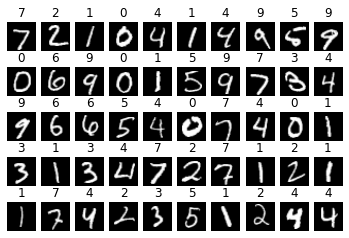

In [3]:
# Load the dataset:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pickle, gzip
f = gzip.open('mnist.pkl.gz','rb')

train_set, valid_set, test_set = pickle.load(f,encoding='unicode-escape')
f.close()
x_train,y_train=train_set[0],train_set[1]
x_valid,y_valid=valid_set[0],valid_set[1]
x_test,y_test=test_set[0],test_set[1]

# Examine the dataset:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
print(np.min(x_train),np.max(x_train),np.min(y_train),np.max(y_train))
for i in range(50):
    subplot(5,10,i+1)
    imshow(x_test[i].reshape([28,28]),cmap='gray');
    title(str(y_test[i]));
    axis('off')
    
# Transform NumPy arrays to PyTorch tensors:
use_cuda=t.cuda.is_available()

X_train=t.from_numpy(x_train)
Y_train=t.from_numpy(y_train)
X_test=t.from_numpy(x_test)
Y_test=t.from_numpy(y_test)

if(use_cuda):
    X_train=X_train.cuda()
    Y_train=Y_train.cuda()
    X_test=X_test.cuda()
    Y_test=Y_test.cuda()

# 目標: 比較使用Numpy/Pytorch搭建的Model，在訓練效率上的差異來源
## 問題
<br>**Numpy Model**: 僅要3個Epoch就可以達到近9成的正確率</br>
<br>**PyTorch Model**: 需要近100個Epoch才能達到約9成正確率,  Why?<br>

<br>1.下面分別是兩種Model的程式碼，作為說明索引之用。</br>
<br>2.接下來實作每個Tip，程式碼需要修改的行、修改該行的意義說明、以及跑出來的結果圖片截圖。</br>


## 實作Tip

### Tip1

# PyTorch Model 在這裡

In [4]:
# Here is the PyTorch net:

D_in,H,D_out=784,100,10

# Training the network:
model = t.nn.Sequential(
    t.nn.Linear(D_in, H),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    #t.nn.Dropout(p=0.5),
    t.nn.Linear(H, H),
    t.nn.BatchNorm1d(H),
    t.nn.ReLU(),
    #t.nn.Dropout(p=0.5),
    t.nn.Linear(H, D_out),
    t.nn.Softmax()
)

loss_fn = t.nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = t.optim.Adam(model.parameters(), lr=learning_rate) #https://pytorch.org/docs/stable/optim.html

if(use_cuda):
    model=model.cuda()
    loss_fn=loss_fn.cuda()
    
for i in range(51):
    # Forward pass:
    Y_pred = model(X_train)

    loss = loss_fn(Y_pred, Y_train)
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass:
    loss.backward()

    # Update the weights using gradient descent:
    optimizer.step()
    
    # Check training accuracy:
    if i % 10 == 0:
        Y_pred = model(X_train) # Y_pred.shape=[50000,10]
        Y_pred = t.max(Y_pred,1)[1] # Y_pred.shape=[50000]
        print('epoch ',i,':',(Y_pred==Y_train).sum().item()/Y_train.shape[0])

C:\Users\User\Anaconda3\Lib\site-packages\torch\nn\modules\container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


epoch  0 : 0.1056
epoch  10 : 0.33906
epoch  20 : 0.47538
epoch  30 : 0.53698
epoch  40 : 0.57706
epoch  50 : 0.61134


# Numpy Model 在這裡

### [Numpy] Activation & error functions

In [10]:
# Activation & error functions:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    
    
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) 
    return np.exp(x) / np.sum(np.exp(x))

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1) # one-hot coding
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size





### [Numpy] Layers

In [ ]:
# Layers:

class Identity: #x
    def forward(self,x):
        return x
    
    def backward(self,dout):
        return dout
    
class Relu: # max(0,x)
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid: # 1/(1+exp(-x))
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine: # Wx+b
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        
        self.dW = None
        self.db = None

    def forward(self, x):
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  
        return dx
    
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None 
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # one-hot vector
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx


class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None  

        self.running_mean = running_mean
        self.running_var = running_var  
        
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx

### [Numpy] Optimizers

In [ ]:
# Optimizer
class SGD:

    """（Stochastic Gradient Descent）"""

    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] 


class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]
            
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

### [Numpy] Network

In [ ]:
# Network:
class MultiLayerNetExtend:    
    "Weiht Decay + Dropout + Batch Normalization"
    
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0, 
                 use_dropout = False, dropout_ratio = 0.5, use_batchnorm=False):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.use_dropout = use_dropout
        self.weight_decay_lambda = weight_decay_lambda
        self.use_batchnorm = use_batchnorm
        self.params = {}

        self.__init_weight(weight_init_std)

        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            if self.use_batchnorm:
                self.params['gamma' + str(idx)] = np.ones(hidden_size_list[idx-1])
                self.params['beta' + str(idx)] = np.zeros(hidden_size_list[idx-1])
                self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], self.params['beta' + str(idx)])
                
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
            
            if self.use_dropout:
                self.layers['Dropout' + str(idx)] = Dropout(dropout_ratio)

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):

        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # for ReLu
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # for Sigmoid
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x, train_flg=False):
        for key, layer in self.layers.items():
            if "Dropout" in key or "BatchNorm" in key:
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)

        return x

    def loss(self, x, t, train_flg=False):
        y = self.predict(x, train_flg)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, X, T):
        Y = self.predict(X, train_flg=False)
        Y = np.argmax(Y, axis=1)
        if T.ndim != 1 : T = np.argmax(T, axis=1)

        accuracy = np.sum(Y == T) / float(X.shape[0])
        return accuracy

    def gradient(self, x, t):
        # forward
        self.loss(x, t, train_flg=True)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.params['W' + str(idx)]
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
                grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta

        return grads

### [Numpy] Training the network

In [16]:
# Training the network:
from collections import OrderedDict
max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01
weight_init_std = 0.01

model=MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                        weight_init_std=weight_init_std, use_batchnorm=True, use_dropout=True)

optimizer = SGD(lr=learning_rate)
train_acc_list = []
    
iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0
    
for i in range(10000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    grads = model.gradient(x_batch, y_batch)
    optimizer.update(model.params, grads)
    if i % iter_per_epoch == 0:
        train_acc = model.accuracy(x_train, y_train)
        train_acc_list.append(train_acc)
        print("epoch:" + str(epoch_cnt) + " | " + str(train_acc))
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0 | 0.1055
epoch:1 | 0.78754
epoch:2 | 0.90664
epoch:3 | 0.92392
epoch:4 | 0.93462
epoch:5 | 0.94124
epoch:6 | 0.9454
epoch:7 | 0.94846
epoch:8 | 0.95324
epoch:9 | 0.95428
epoch:10 | 0.95606
epoch:11 | 0.9578
epoch:12 | 0.96132
epoch:13 | 0.96258
epoch:14 | 0.96304
epoch:15 | 0.96382
epoch:16 | 0.9646
epoch:17 | 0.9675
epoch:18 | 0.9674
epoch:19 | 0.96768
